In [1]:
# pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 393.8 kB/s eta 0:00:08
      --------------------------------------- 0.1/3.0 MB 409.6 kB/s eta 0:00:08
     - -------------------------------------- 0.1/3.0 MB 512.0 kB/s eta 0:00:06
     - -------------------------------------- 0.1/3.0 MB 504.4 kB/s eta 0:00:06
     - -------------------------------------- 0.1/3.0 MB 502.3 kB/s eta 0:00:06
     - -------------------------------------- 0.1/3.0 MB 502.3 kB/s eta 0:00:06
     - -------------------------------------- 0.1/3.0 MB 502.3 kB/s eta 0:00:06
     - -------------------------------------- 0.1/3.0 MB 502.3 kB/s eta 0:00:06
     -- ------------------------------------- 0.2/3.0 MB 479.2 kB/s eta 0:00:06
     -- ------------------------------------- 0.2/3.0 MB 479.2 kB/s

In [3]:
import yfinance as yf

In [11]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [13]:
stock = "META"
meta_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [15]:
meta_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.115238,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.927845,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.906942,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.903940,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.930851,50237200


In [17]:
meta_data.shape

(3116, 6)

In [19]:
meta_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3116.000000,3116.000000,3116.000000,3116.000000,3116.000000,3.116000e+03
mean,177.898691,180.211848,175.669528,177.993774,177.502340,2.966687e+07
std,118.876779,120.402358,117.428716,118.961923,118.725634,2.590017e+07
min,18.080000,18.270000,17.549999,17.730000,17.676777,3.696991e+06
25%,85.837498,86.737499,84.302498,85.565001,85.308146,1.568252e+07
50%,163.584999,166.085007,161.254997,163.945000,163.452866,2.193910e+07
75%,231.460007,234.952499,228.805004,232.525002,231.827007,3.404688e+07
max,598.219971,602.950012,593.778992,596.690002,596.690002,5.735764e+08


In [21]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3116 entries, 2012-05-18 to 2024-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3116 non-null   float64
 1   High       3116 non-null   float64
 2   Low        3116 non-null   float64
 3   Close      3116 non-null   float64
 4   Adj Close  3116 non-null   float64
 5   Volume     3116 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 170.4 KB


In [25]:
meta_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing Price of meta data')

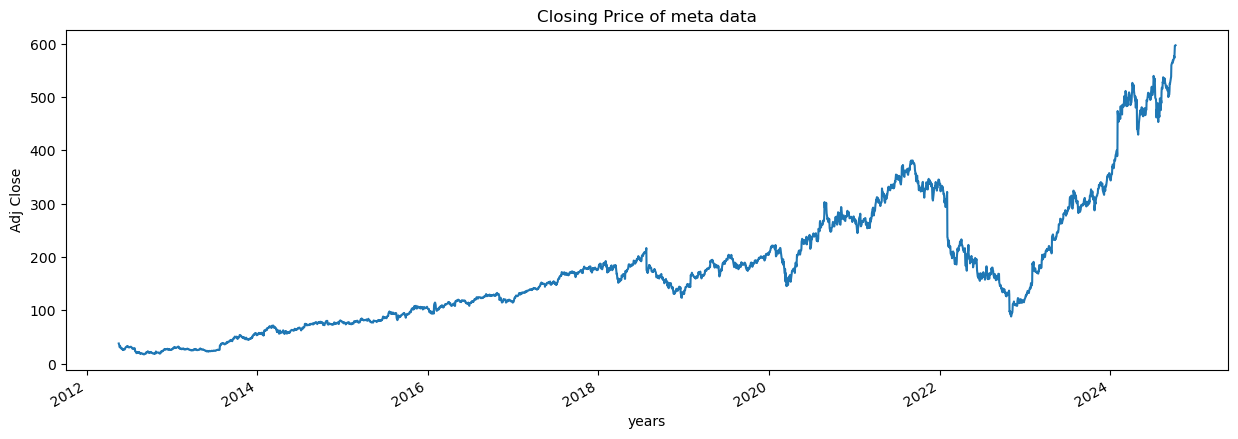

In [29]:
plt.figure(figsize = (15,5))
meta_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of meta data")

In [31]:
def plt_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of meta data")

In [33]:
meta_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

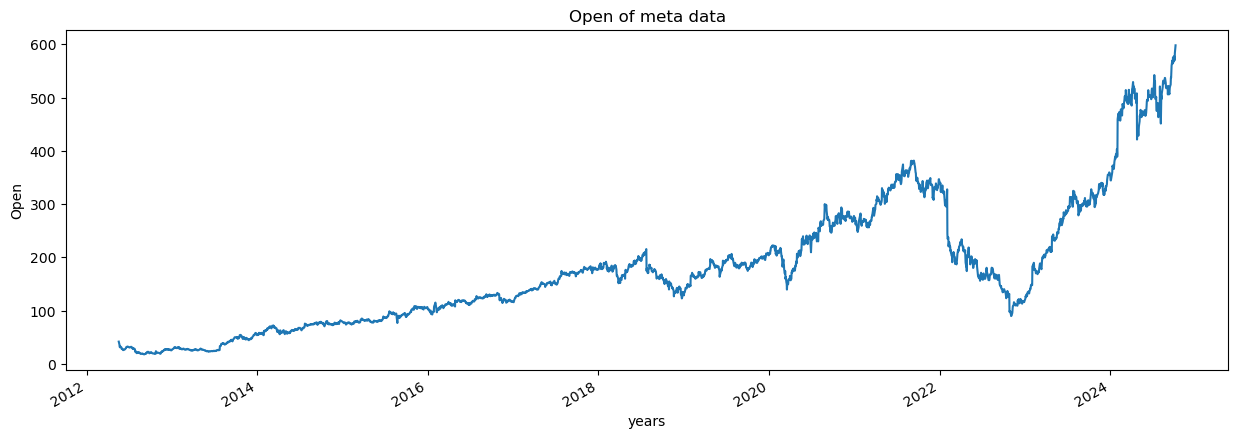

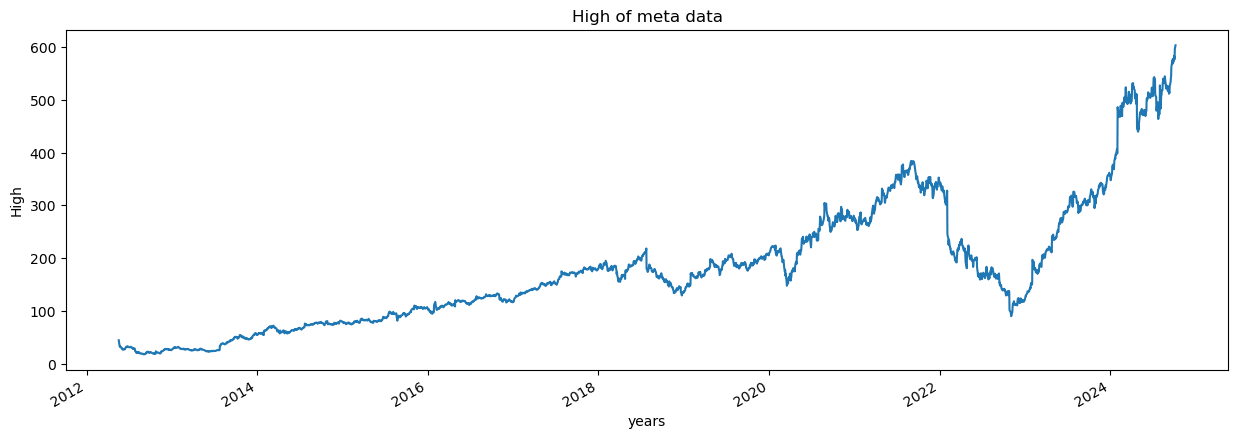

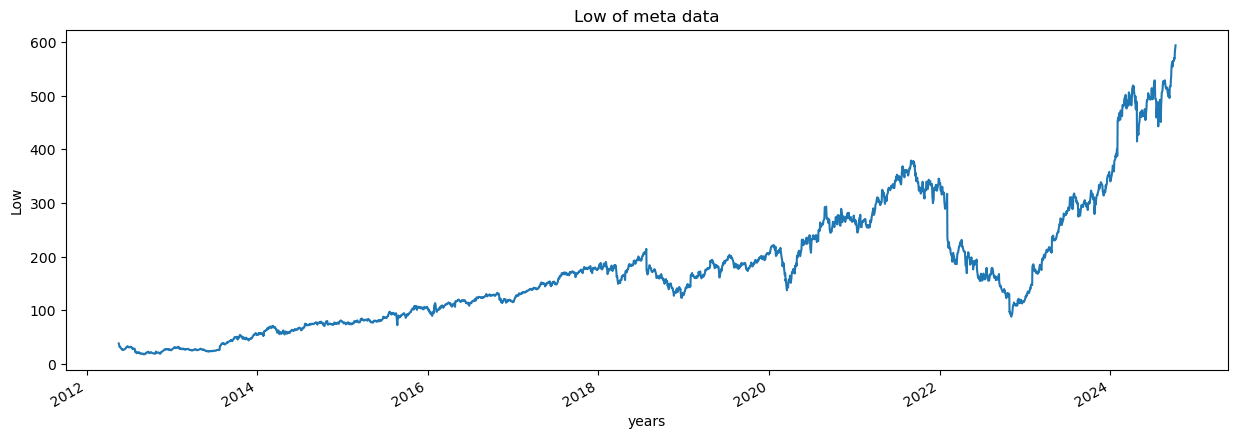

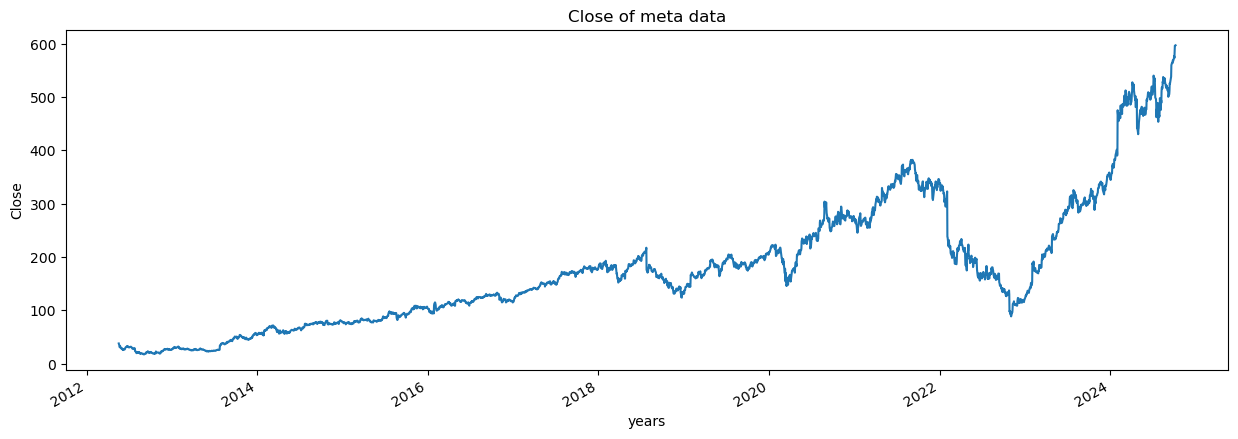

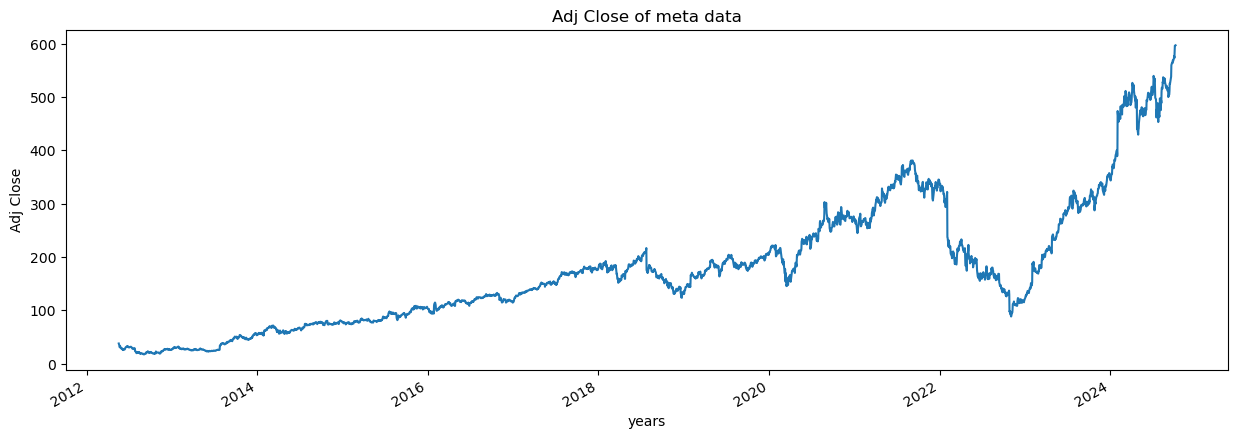

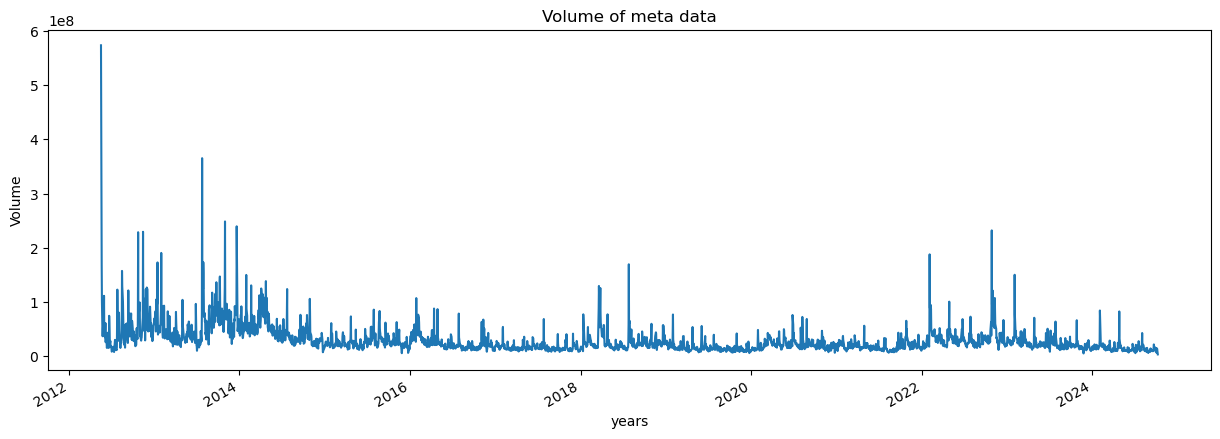

In [35]:
for column in meta_data.columns:
    plt_graph((15,5), meta_data[column], column)

In [37]:
#10,20,30,40,50,60,70,80,90,100

#  MA for 5 days = null null null null 

In [41]:
temp_data = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:6])/5)

40.0


In [45]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [51]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [55]:
for i in range(2014,2024):
    print(i, list(meta_data.index.year).count(i))

2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [57]:
meta_data['MA_for_250_days'] = meta_data['Adj Close'].rolling(250).mean()

In [61]:
meta_data['MA_for_250_days'][0:250].tail()

Date
2013-05-13         NaN
2013-05-14         NaN
2013-05-15         NaN
2013-05-16         NaN
2013-05-17    25.79976
Name: MA_for_250_days, dtype: float64

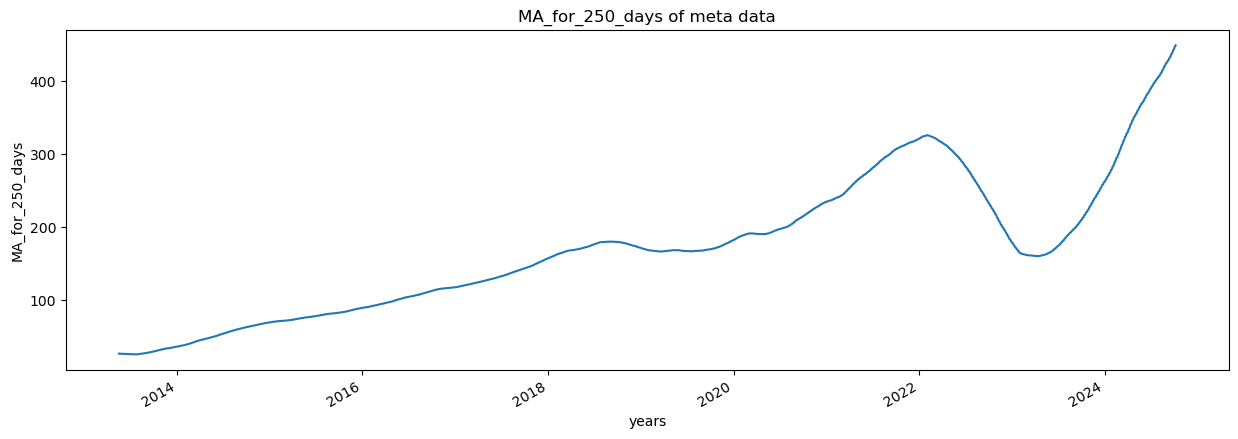

In [65]:
plt_graph((15,5), meta_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

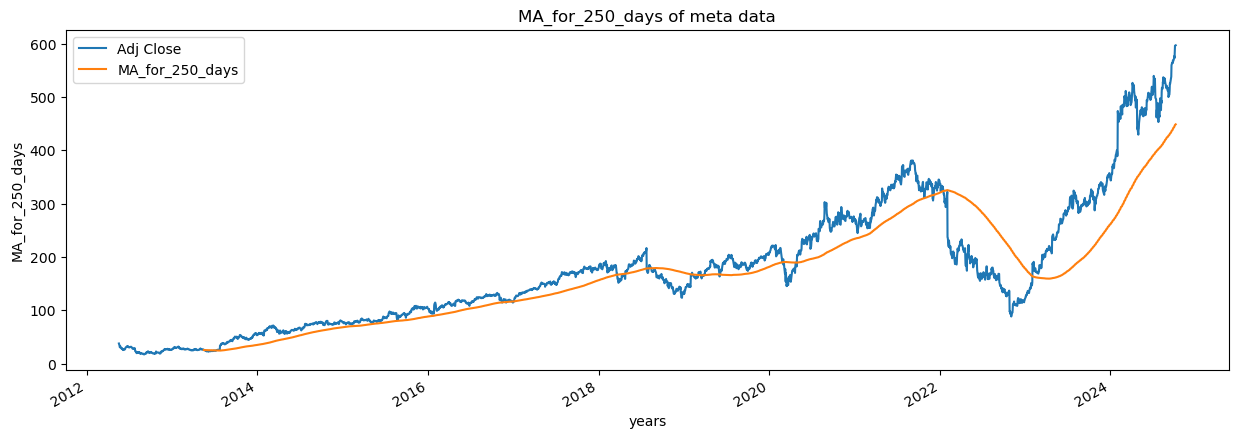

In [67]:
plt_graph((15,5), meta_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

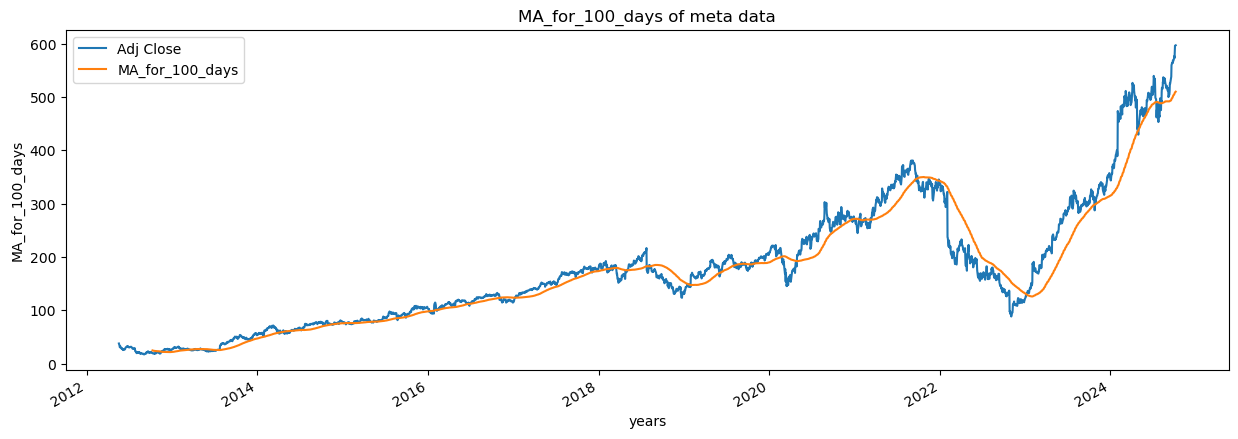

In [71]:
meta_data['MA_for_100_days'] = meta_data['Adj Close'].rolling(100).mean()
plt_graph((15,5), meta_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

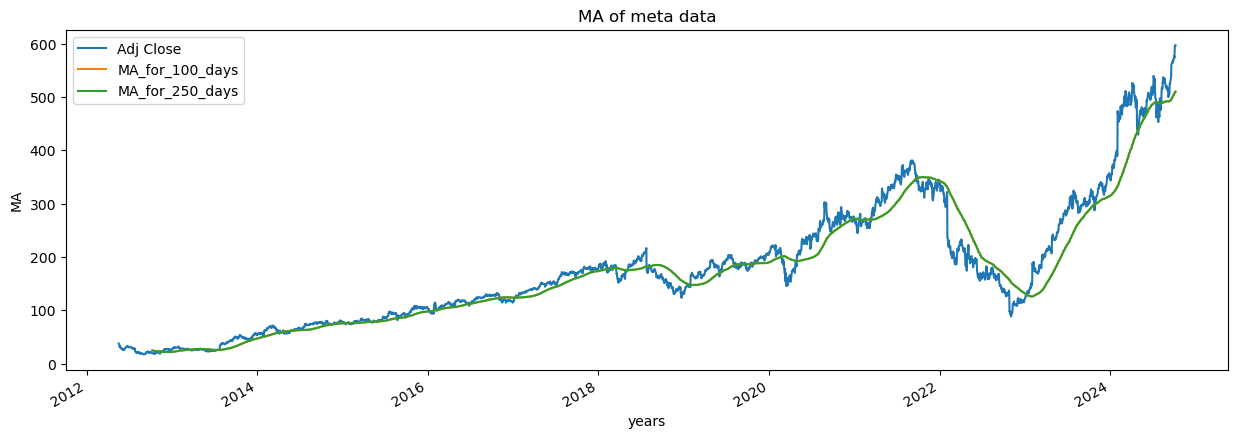

In [78]:
plt_graph((15,5), meta_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [82]:
meta_data['percentage_change_cp'] = meta_data['Adj Close'].pct_change()
meta_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2012-05-18,38.115238,NaN
2012-05-21,33.927845,-0.109861
2012-05-22,30.906942,-0.089039
2012-05-23,31.903940,0.032258
2012-05-24,32.930851,0.032188


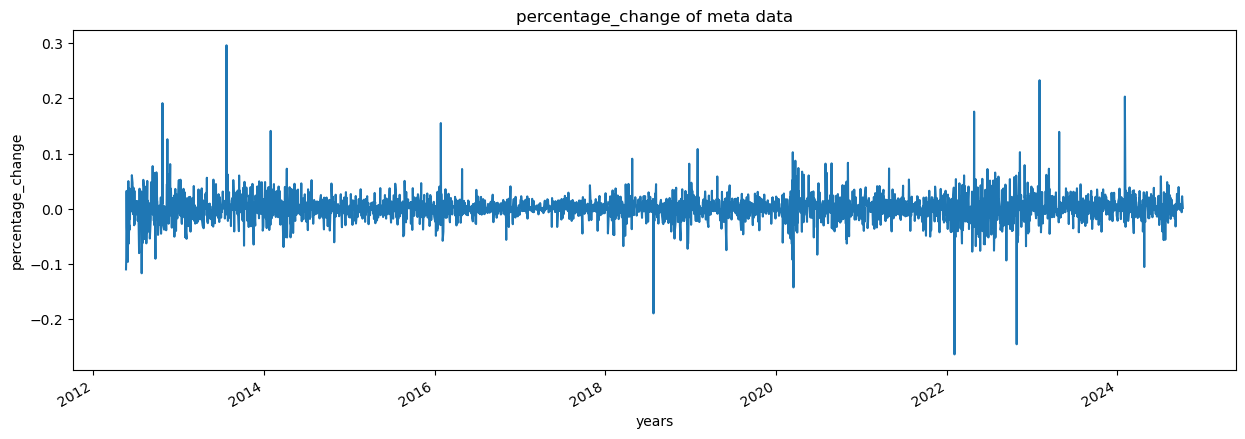

In [88]:
plt_graph((15,5), meta_data['percentage_change_cp'], 'percentage_change')

In [92]:
Adj_close_price = meta_data[['Adj Close']]

In [94]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([596.69000244]), array([17.67677689]))

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.03529878],
       [0.02806683],
       [0.0228495 ],
       ...,
       [0.97595913],
       [0.99870469],
       [1.        ]])

In [102]:
len(scaled_data)

3116

In [110]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [112]:
x_data[0],y_data[0]

(array([[0.03529878],
        [0.02806683],
        [0.0228495 ],
        [0.0245714 ],
        [0.02634495],
        [0.02441643],
        [0.01913022],
        [0.01801099],
        [0.02043886],
        [0.0172017 ],
        [0.01578975],
        [0.0140162 ],
        [0.01563478],
        [0.01477383],
        [0.01613413],
        [0.01597915],
        [0.0166507 ],
        [0.01642685],
        [0.01818318],
        [0.02114483],
        [0.02355548],
        [0.02441643],
        [0.02388264],
        [0.0242959 ],
        [0.02637939],
        [0.02467471],
        [0.02646548],
        [0.02496744],
        [0.02346939],
        [0.0230217 ],
        [0.02245347],
        [0.02319389],
        [0.0236588 ],
        [0.02410649],
        [0.02486412],
        [0.0236588 ],
        [0.02279785],
        [0.02252235],
        [0.02236738],
        [0.01811431],
        [0.0178388 ],
        [0.01959513],
        [0.01940572],
        [0.01899247],
        [0.01897525],
        [0

In [114]:

int(len(x_data)*0.7)

2111

In [118]:
3116-100-int(len(x_data)*0.7)

905

In [120]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [124]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2111, 100, 1)
(2111, 1)
(905, 100, 1)
(905, 1)


In [126]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [142]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1],1), return_sequences=True ))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [146]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [148]:
model.fit(x_train, y_train, batch_size=1, epochs = 4)

Epoch 1/4
2111/2111 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - loss: 8.8765e-04
Epoch 2/4
2111/2111 ━━━━━━━━━━━━━━━━━━━━ 50s 24ms/step - loss: 2.6584e-04
Epoch 3/4
2111/2111 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - loss: 1.2862e-04
Epoch 4/4
2111/2111 ━━━━━━━━━━━━━━━━━━━━ 51s 24ms/step - loss: 8.7513e-05


In [150]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [154]:
predictions = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [156]:
predictions

array([[0.39829367],
       [0.40123248],
       [0.41164067],
       [0.3985538 ],
       [0.4129963 ],
       [0.41280246],
       [0.4259196 ],
       [0.41808593],
       [0.42528504],
       [0.43434647],
       [0.44202414],
       [0.4339638 ],
       [0.45101193],
       [0.45759937],
       [0.45320177],
       [0.43994477],
       [0.43468755],
       [0.44207197],
       [0.45520988],
       [0.45148212],
       [0.46075842],
       [0.46740952],
       [0.4831649 ],
       [0.4793115 ],
       [0.48920086],
       [0.48965487],
       [0.48888022],
       [0.48782367],
       [0.4856063 ],
       [0.47538882],
       [0.48335966],
       [0.4818795 ],
       [0.47574514],
       [0.47617587],
       [0.47457725],
       [0.46687335],
       [0.47365907],
       [0.47704327],
       [0.4776304 ],
       [0.48268393],
       [0.5174948 ],
       [0.511189  ],
       [0.5055813 ],
       [0.4987554 ],
       [0.49405506],
       [0.50269854],
       [0.50235635],
       [0.482

In [158]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[248.29408 ],
       [249.9957  ],
       [256.02216 ],
       [248.44469 ],
       [256.8071  ],
       [256.69485 ],
       [264.28986 ],
       [259.75406 ],
       [263.92245 ],
       [269.16913 ],
       [273.6146  ],
       [268.94757 ],
       [278.81863 ],
       [282.63287 ],
       [280.0866  ],
       [272.4106  ],
       [269.3666  ],
       [273.6423  ],
       [281.24933 ],
       [279.09088 ],
       [284.462   ],
       [288.31308 ],
       [297.43564 ],
       [295.2045  ],
       [300.93057 ],
       [301.19345 ],
       [300.74487 ],
       [300.13312 ],
       [298.84924 ],
       [292.9332  ],
       [297.54843 ],
       [296.6914  ],
       [293.1395  ],
       [293.38892 ],
       [292.4633  ],
       [288.00262 ],
       [291.93167 ],
       [293.89114 ],
       [294.2311  ],
       [297.15717 ],
       [317.3131  ],
       [313.66196 ],
       [310.41504 ],
       [306.46274 ],
       [303.7412  ],
       [308.74588 ],
       [308.54776 ],
       [296.8

In [160]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[256.86663818],
       [263.48666382],
       [254.54359436],
       [264.94229126],
       [264.10482788],
       [273.05786133],
       [267.59429932],
       [272.92825317],
       [278.44165039],
       [283.1574707 ],
       [277.78366089],
       [289.23913574],
       [292.65887451],
       [289.75756836],
       [281.2930603 ],
       [277.90325928],
       [282.17041016],
       [289.94702148],
       [287.13546753],
       [293.64587402],
       [297.76345825],
       [307.98272705],
       [305.34066772],
       [312.15014648],
       [312.08035278],
       [311.52203369],
       [310.60479736],
       [308.83013916],
       [301.91101074],
       [306.89596558],
       [305.26089478],
       [301.33270264],
       [301.7414856 ],
       [300.56503296],
       [295.62991333],
       [300.22607422],
       [302.13031006],
       [302.65872192],
       [306.1781311 ],
       [328.52087402],
       [324.10418701],
       [321.61166382],
       [317.40429688],
       [314

In [164]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [166]:
rmse

12.883658487638026

In [168]:
plotting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    } ,
        index = meta_data.index[splitting_len+100:]
)
plotting_data.head()       

,Original_test_data,predictions
Date,,
2021-03-04,256.866638,248.294083
2021-03-05,263.486664,249.995697
2021-03-08,254.543594,256.022156
2021-03-09,264.942291,248.444687
2021-03-10,264.104828,256.807098


<Figure size 640x480 with 0 Axes>

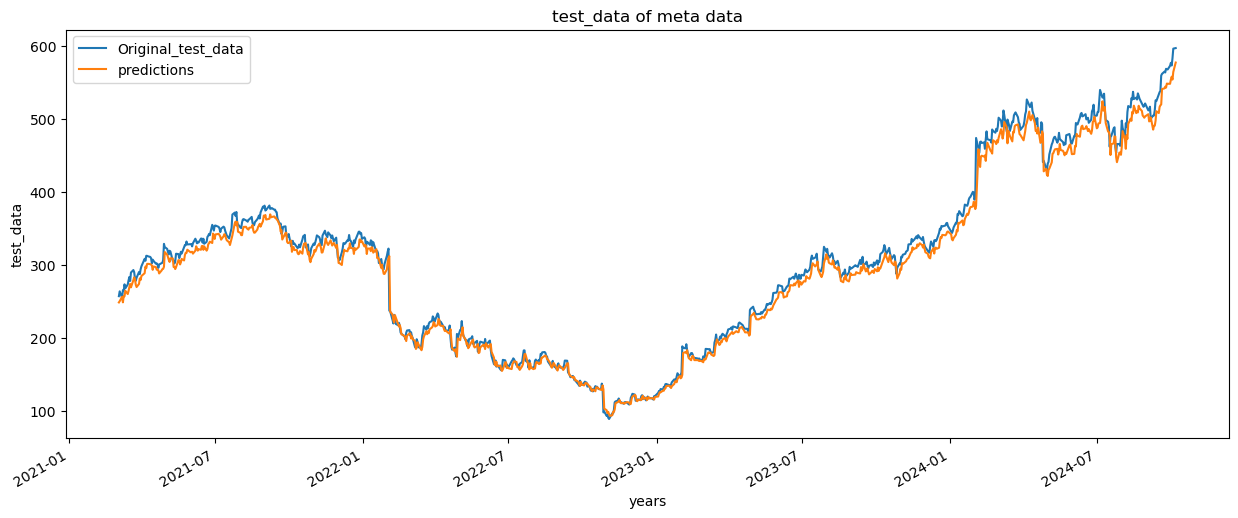

In [172]:
plt_graph((15,6), plotting_data, 'test_data')

<Figure size 640x480 with 0 Axes>

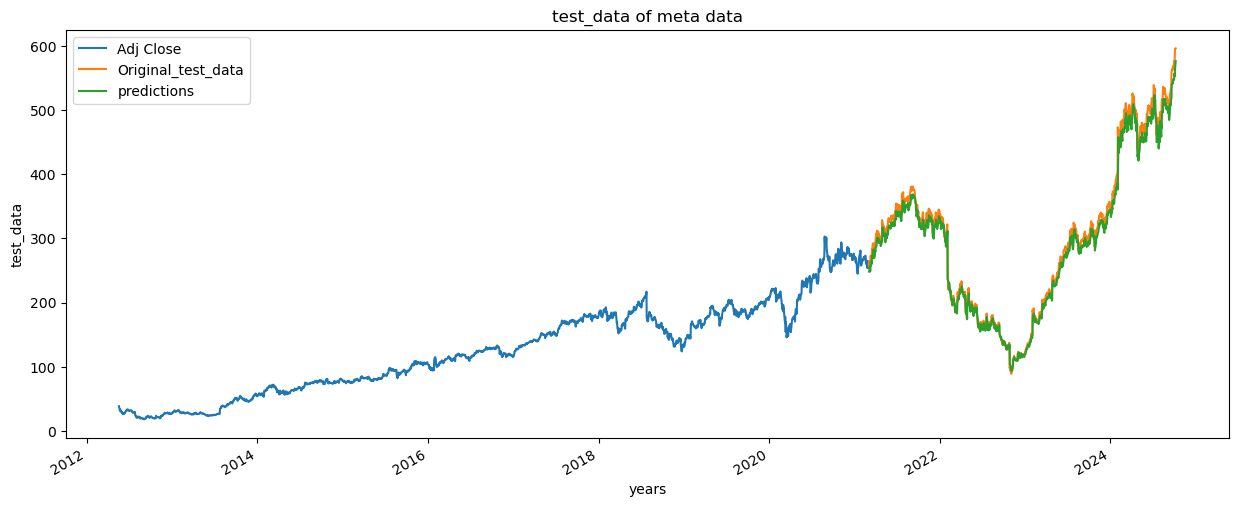

In [176]:
plt_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],plotting_data], axis=0), 'test_data')

In [178]:
model.save("Latest_stock_price_model.keras")